In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from plotly import plotly as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("../tabelas/dataset_outlier_detection_20190506.xlsx")

In [3]:
df.head()

,cnpj,num_ocorr_cr,num_ocorr_proc,num_ocorr_infra,num_ocorr_out,comp_cr,comp_proc,comp_infra,comp_out,risco_cr,risco_proc,risco_infra,risco_out,data_abertura,idade,dispersao
0,225356000123,0,0,0,1,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.001192,1994-10-04,24.508197,NaN
1,265954000207,0,0,0,1,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000516,2000-07-03,18.773224,NaN
2,272073000302,0,0,0,6,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.011551,2008-06-10,10.852459,0.0
3,437101000124,3,0,0,1,0.972151,0.0,0.0,0.027849,0.713651,0.0,0.0,0.000041,1995-02-14,24.144809,0.0
4,661205000118,1,0,0,0,1.000000,0.0,0.0,0.000000,0.910038,0.0,0.0,0.000000,1995-06-22,23.795082,NaN


In [4]:
df.shape

(491, 16)

In [5]:
df["cnpj"] = df["cnpj"].astype(str)

In [6]:
df["cnpj"] = df.apply(lambda x : "0" + x["cnpj"] if len(x["cnpj"])==13 else
                      ("00" + x["cnpj"] if len(x["cnpj"])==12 else x["cnpj"]), axis=1)

In [7]:
# incluir itau e bb na analise de outliers
df[df['cnpj']=="60701190000104"]

,cnpj,num_ocorr_cr,num_ocorr_proc,num_ocorr_infra,num_ocorr_out,comp_cr,comp_proc,comp_infra,comp_out,risco_cr,risco_proc,risco_infra,risco_out,data_abertura,idade,dispersao


In [8]:
df.head()

,cnpj,num_ocorr_cr,num_ocorr_proc,num_ocorr_infra,num_ocorr_out,comp_cr,comp_proc,comp_infra,comp_out,risco_cr,risco_proc,risco_infra,risco_out,data_abertura,idade,dispersao
0,00225356000123,0,0,0,1,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.001192,1994-10-04,24.508197,NaN
1,00265954000207,0,0,0,1,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000516,2000-07-03,18.773224,NaN
2,00272073000302,0,0,0,6,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.011551,2008-06-10,10.852459,0.0
3,00437101000124,3,0,0,1,0.972151,0.0,0.0,0.027849,0.713651,0.0,0.0,0.000041,1995-02-14,24.144809,0.0
4,00661205000118,1,0,0,0,1.000000,0.0,0.0,0.000000,0.910038,0.0,0.0,0.000000,1995-06-22,23.795082,NaN


In [9]:
df.index = df.cnpj

In [10]:
df = df.drop("cnpj", 1)

In [11]:
df.fillna(0, inplace=True)

In [12]:
df = df.drop("data_abertura", 1)

In [13]:
df.head()

,num_ocorr_cr,num_ocorr_proc,num_ocorr_infra,num_ocorr_out,comp_cr,comp_proc,comp_infra,comp_out,risco_cr,risco_proc,risco_infra,risco_out,idade,dispersao
cnpj,,,,,,,,,,,,,,
00225356000123,0,0,0,1,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.001192,24.508197,0.0
00265954000207,0,0,0,1,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000516,18.773224,0.0
00272073000302,0,0,0,6,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.011551,10.852459,0.0
00437101000124,3,0,0,1,0.972151,0.0,0.0,0.027849,0.713651,0.0,0.0,0.000041,24.144809,0.0
00661205000118,1,0,0,0,1.000000,0.0,0.0,0.000000,0.910038,0.0,0.0,0.000000,23.795082,0.0


In [86]:
# outlier detection

In [14]:
X = df.copy()

outlier_detect =  IsolationForest(n_estimators=100,
                                 max_samples=1000, contamination=.05, max_features=X.shape[1], random_state=1)

outlier_detect.fit(X)

outliers_predicted = outlier_detect.predict(X)

df["outlier"] = outliers_predicted

df[df['outlier']==-1]

,num_ocorr_cr,num_ocorr_proc,num_ocorr_infra,num_ocorr_out,comp_cr,comp_proc,comp_infra,comp_out,risco_cr,risco_proc,risco_infra,risco_out,idade,dispersao,outlier
cnpj,,,,,,,,,,,,,,,
02306070000106,0,0,1,4,0.000000,0.000000,0.046720,0.953280,0.000000,0.000000,0.050100,0.166567,21.256831,0.25,-1
02595658000119,1,0,8,7,0.433648,0.000000,0.011067,0.555284,0.049658,0.000000,0.125014,0.031938,20.830601,0.00,-1
02668113000195,1,2,0,0,0.175079,0.824921,0.000000,0.000000,0.251726,0.409978,0.000000,0.000000,20.852459,0.00,-1
03334511000138,0,1,0,0,0.000000,1.000000,0.000000,0.000000,0.000000,0.527483,0.000000,0.000000,19.680328,0.25,-1
05337303000118,0,2,0,0,0.000000,1.000000,0.000000,0.000000,0.000000,0.524255,0.000000,0.000000,16.696721,0.00,-1
09202523000195,0,0,3,0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.253555,0.000000,11.423497,0.00,-1
09286118000100,3,0,2,3,0.774569,0.000000,0.052482,0.172949,0.287292,0.000000,0.062518,0.000301,11.284153,0.00,-1
09456517000164,7,0,0,44,0.297896,0.000000,0.000000,0.702104,0.105288,0.000000,0.000000,0.081935,11.040984,0.25,-1
10532480000195,0,4,0,6,0.000000,0.757058,0.000000,0.242942,0.000000,0.246647,0.000000,0.007205,10.357923,0.00,-1


In [15]:
# outliers visualization using PCA

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X.head()

,num_ocorr_cr,num_ocorr_proc,num_ocorr_infra,num_ocorr_out,comp_cr,comp_proc,comp_infra,comp_out,risco_cr,risco_proc,risco_infra,risco_out,idade,dispersao
cnpj,,,,,,,,,,,,,,
00225356000123,0,0,0,1,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.001192,24.508197,0.0
00265954000207,0,0,0,1,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000516,18.773224,0.0
00272073000302,0,0,0,6,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.011551,10.852459,0.0
00437101000124,3,0,0,1,0.972151,0.0,0.0,0.027849,0.713651,0.0,0.0,0.000041,24.144809,0.0
00661205000118,1,0,0,0,1.000000,0.0,0.0,0.000000,0.910038,0.0,0.0,0.000000,23.795082,0.0


In [18]:
features = list(X.columns)

In [19]:
x = X.loc[:, features].values

In [20]:
x

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.19194561e-03, 2.45081967e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.15855657e-04, 1.87732240e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.15510078e-02, 1.08524590e+01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.82296674e-02, 2.80491803e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.21311292e-02, 2.60710383e+01, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.45115353e-01, 7.78415301e+00, 0.00000000e+00]])

In [21]:
x = StandardScaler().fit_transform(x)

In [22]:
x

array([[-0.36343403, -0.2378922 , -0.16592578, ..., -0.60990953,
         1.65790534, -0.24563174],
       [-0.36343403, -0.2378922 , -0.16592578, ..., -0.62215401,
         0.95340761, -0.24563174],
       [-0.36343403, -0.2378922 , -0.16592578, ..., -0.42229931,
        -0.01959807, -0.24563174],
       ...,
       [-0.36343403, -0.2378922 , -0.16592578, ..., -0.12023654,
         2.09288821, -0.24563174],
       [-0.36343403, -0.2378922 , -0.16592578, ..., -0.41179288,
         1.84988852, -0.24563174],
       [-0.36343403, -0.2378922 , -0.16592578, ...,  1.99664902,
        -0.39651611, -0.24563174]])

In [23]:
y = df.loc[:, ["outlier"]].values

In [24]:
df_pca = X.copy()

In [25]:
df_pca.iloc[:, :] = x

In [99]:
# df_pca["outlier"] = y

In [26]:
df_pca.head()

,num_ocorr_cr,num_ocorr_proc,num_ocorr_infra,num_ocorr_out,comp_cr,comp_proc,comp_infra,comp_out,risco_cr,risco_proc,risco_infra,risco_out,idade,dispersao
cnpj,,,,,,,,,,,,,,
00225356000123,-0.363434,-0.237892,-0.165926,-0.314806,-0.395694,-0.224953,-0.192473,0.533300,-0.362455,-0.205214,-0.229706,-0.609910,1.657905,-0.245632
00265954000207,-0.363434,-0.237892,-0.165926,-0.314806,-0.395694,-0.224953,-0.192473,0.533300,-0.362455,-0.205214,-0.229706,-0.622154,0.953408,-0.245632
00272073000302,-0.363434,-0.237892,-0.165926,0.137682,-0.395694,-0.224953,-0.192473,0.533300,-0.362455,-0.205214,-0.229706,-0.422299,-0.019598,-0.245632
00437101000124,3.818897,-0.237892,-0.165926,-0.314806,2.892686,-0.224953,-0.192473,-2.142907,3.050221,-0.205214,-0.229706,-0.630748,1.613266,-0.245632
00661205000118,1.030676,-0.237892,-0.165926,-0.405304,2.986888,-0.224953,-0.192473,-2.219572,3.989344,-0.205214,-0.229706,-0.631497,1.570305,-0.245632


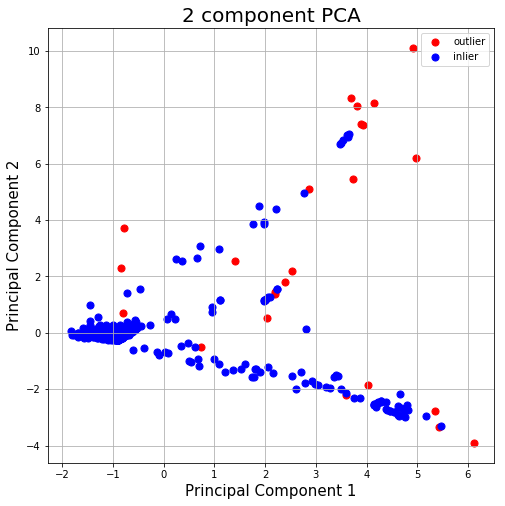

In [27]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(df_pca)

df_pca = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])

df_pca["outlier"] = outliers_predicted

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["outlier", "inlier"]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_pca['outlier'] == -1 if target == "outlier" else df_pca['outlier'] == 1
    ax.scatter(df_pca.loc[indicesToKeep, 'pc1']
               , df_pca.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [29]:
df.head()

,num_ocorr_cr,num_ocorr_proc,num_ocorr_infra,num_ocorr_out,comp_cr,comp_proc,comp_infra,comp_out,risco_cr,risco_proc,risco_infra,risco_out,idade,dispersao,outlier
cnpj,,,,,,,,,,,,,,,
00225356000123,0,0,0,1,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.001192,24.508197,0.0,1
00265954000207,0,0,0,1,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000516,18.773224,0.0,1
00272073000302,0,0,0,6,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.011551,10.852459,0.0,1
00437101000124,3,0,0,1,0.972151,0.0,0.0,0.027849,0.713651,0.0,0.0,0.000041,24.144809,0.0,1
00661205000118,1,0,0,0,1.000000,0.0,0.0,0.000000,0.910038,0.0,0.0,0.000000,23.795082,0.0,1


In [31]:
df_out = df[df['outlier']==-1]

In [33]:
df_out = df_out.reset_index()

In [41]:
df_out.sort_values("idade").head(10)

,cnpj,num_ocorr_cr,num_ocorr_proc,num_ocorr_infra,num_ocorr_out,comp_cr,comp_proc,comp_infra,comp_out,risco_cr,risco_proc,risco_infra,risco_out,idade,dispersao,outlier
17,20687292000190,0,0,6,0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.259677,0.000000,4.751366,0.00,-1
16,20124081000149,0,0,1,0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.266104,0.000000,4.997268,0.00,-1
15,19509360000141,5,0,0,1,0.976052,0.000000,0.000000,0.023948,0.753205,0.000000,0.000000,0.000015,5.270492,0.00,-1
14,17464661000170,0,1,14,9,0.000000,0.578737,0.093712,0.327551,0.000000,0.024981,0.147356,0.011957,6.237705,0.00,-1
13,14534748000189,1,2,0,183,0.009443,0.058746,0.000000,0.931811,0.004032,0.005386,0.000000,0.212983,7.505464,0.00,-1
12,13231036000128,1,1,0,1,0.176816,0.362907,0.000000,0.460277,0.252043,0.175275,0.000000,0.013847,8.587432,0.00,-1
10,11368505000120,2,0,1,7,0.106544,0.000000,0.003958,0.889498,0.150489,0.000000,0.025000,0.119229,9.377049,0.25,-1
11,11377065000177,0,0,16,2,0.000000,0.000000,0.165534,0.834466,0.000000,0.000000,0.223525,0.004138,9.415301,0.00,-1
9,11223079000136,2,0,0,0,1.000000,0.000000,0.000000,0.000000,0.979577,0.000000,0.000000,0.000000,9.510929,0.25,-1
8,10532480000195,0,4,0,6,0.000000,0.757058,0.000000,0.242942,0.000000,0.246647,0.000000,0.007205,10.357923,0.00,-1


In [43]:
df.sort_values('num_ocorr_infra', ascending=False)

,num_ocorr_cr,num_ocorr_proc,num_ocorr_infra,num_ocorr_out,comp_cr,comp_proc,comp_infra,comp_out,risco_cr,risco_proc,risco_infra,risco_out,idade,dispersao,outlier
cnpj,,,,,,,,,,,,,,,
11377065000177,0,0,16,2,0.000000,0.000000,0.165534,0.834466,0.000000,0.000000,0.223525,0.004138,9.415301,0.00,-1
17464661000170,0,1,14,9,0.000000,0.578737,0.093712,0.327551,0.000000,0.024981,0.147356,0.011957,6.237705,0.00,-1
71673990000177,0,3,10,60,0.000000,0.983664,0.003193,0.013143,0.000000,0.023246,0.034247,0.000010,25.827869,1.00,-1
02595658000119,1,0,8,7,0.433648,0.000000,0.011067,0.555284,0.049658,0.000000,0.125014,0.031938,20.830601,0.00,-1
20687292000190,0,0,6,0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.259677,0.000000,4.751366,0.00,-1
17214082000170,0,0,4,0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.254167,0.000000,6.396175,0.00,1
17571404000138,0,0,4,0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.256440,0.000000,6.180328,0.00,1
09202523000195,0,0,3,0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.253555,0.000000,11.423497,0.00,-1
11457630000106,0,0,3,2,0.000000,0.000000,0.168227,0.831773,0.000000,0.000000,0.150119,0.001932,9.262295,0.00,1


In [40]:
df.sort_values("num_ocorr_proc", ascending=False).head()

,num_ocorr_cr,num_ocorr_proc,num_ocorr_infra,num_ocorr_out,comp_cr,comp_proc,comp_infra,comp_out,risco_cr,risco_proc,risco_infra,risco_out,idade,dispersao,outlier
cnpj,,,,,,,,,,,,,,,
10532480000195,0,4,0,6,0.000000,0.757058,0.000000,0.242942,0.000000,0.246647,0.000000,0.007205,10.357923,0.00,-1
72673403000102,0,3,0,3,0.000000,0.797172,0.000000,0.202828,0.000000,0.299271,0.000000,0.003190,25.666667,0.25,-1
71673990000177,0,3,10,60,0.000000,0.983664,0.003193,0.013143,0.000000,0.023246,0.034247,0.000010,25.827869,1.00,-1
59056192000109,1,2,0,3,0.013618,0.788454,0.000000,0.197929,0.125009,0.225647,0.000000,0.005575,27.355191,0.00,-1
05337303000118,0,2,0,0,0.000000,1.000000,0.000000,0.000000,0.000000,0.524255,0.000000,0.000000,16.696721,0.00,-1
